In [7]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from src.data.data_loader import load_final, JerseyNumberDataset
from src.data.data_handling import balancer,plot_label_distribution
from src.models.train_test import test,grid
from src.utils.helpers import save_json

In [8]:
chemin_model="results/finetuned_models/ftd_dirichlet_thresh0.6.pth"
model_name = "finetuned_diwan_augmented_20k_dirichlet_blur_0.3"

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [11]:
model = torch.load(chemin_model, map_location=device)
model.eval()
b = model

c:\Users\skouz\miniconda3\envs\jersey\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
path = "data/final/images"
test_data = load_final(path)
test_data = balancer(test_data,max_0=0)
print("total test : ", len(test_data))

total test :  1028


In [13]:
import torch

print("=== GPU INFO (PyTorch) ===")

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("CUDA version used by PyTorch:", torch.version.cuda)
    print("Number of GPUs:", torch.cuda.device_count())
    
    for i in range(torch.cuda.device_count()):
        print(f"\n--- GPU {i} ---")
        print("Name:", torch.cuda.get_device_name(i))
        print("Total Memory (GB):", round(torch.cuda.get_device_properties(i).total_memory / (1024**3), 2))
        print("Compute Capability:", torch.cuda.get_device_capability(i))
else:
    print("Aucun GPU NVIDIA détecté par PyTorch.")


=== GPU INFO (PyTorch) ===
PyTorch version: 2.2.2
CUDA available: True
CUDA version used by PyTorch: 12.1
Number of GPUs: 1

--- GPU 0 ---
Name: NVIDIA GeForce RTX 2050
Total Memory (GB): 4.0
Compute Capability: (8, 6)


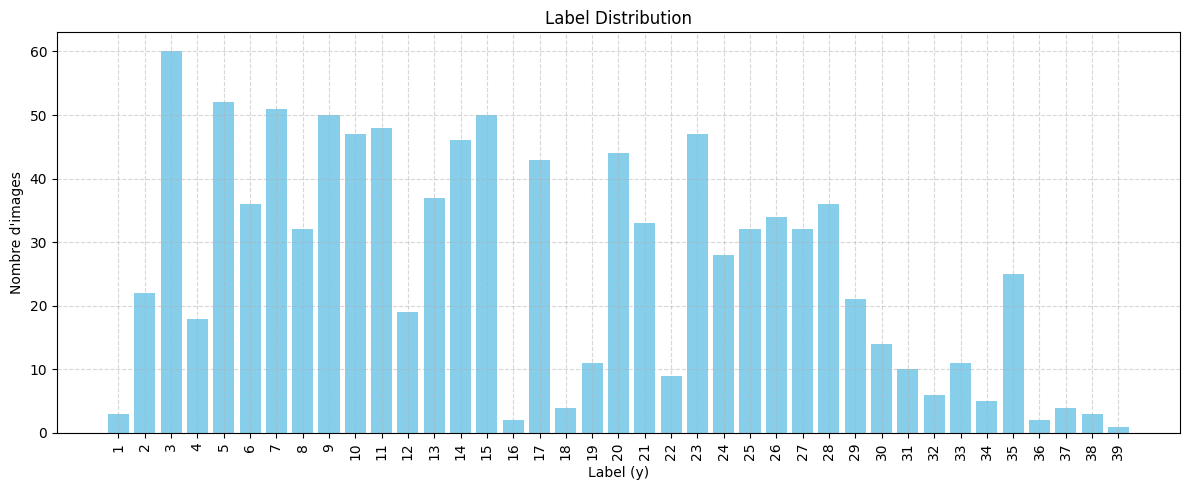

In [6]:
plot_label_distribution(test_data)

In [7]:
print(test_data[0])

{'x': 'data/final/images\\6496fab9658ed7479cc6698f/crops/person/image63.jpg', 'y': 25, 'radius': 0}


In [8]:
cut = "topbottom"
image_size = (224, 224)
batch_size = 64
workers = 1

test_dataset = JerseyNumberDataset(test_data, image_size=image_size,cut=cut)
test_loader = DataLoader(test_dataset,num_workers=workers, batch_size=batch_size, shuffle=True,pin_memory=True)

In [9]:
metrics = test(model,test_loader, device=device)

Mask accuracy(unc_threshold=0.5) : 1.0000

Accuracy:  0.7267

Precision: 0.6522

Recall:    0.6471

F1-score:  0.6320



In [ ]:
image_grid = grid(model, test_loader, device=device)

In [ ]:
"""torch.save(model, f"results/weights/{model_name}.pth")
save_json(test_metrics, f'results/test_metrics/{model_name}.json')
image_grid.savefig(f'results/test_grid/{model_name}.png')
plt.close(image_grid)"""